In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/heart/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##### cp: This column stands for "chest pain type." Chest pain is a common symptom of heart problems, and different types of chest pain may indicate different underlying conditions.
##### trestbps: This abbreviation stands for "resting blood pressure," which is the blood pressure measured when the patient is at rest.
##### chol: This represents the cholesterol level of the patient. Cholesterol levels are important indicators of heart health.
##### fbs: This stand for "fasting blood sugar." Fasting blood sugar levels are often measured to assess the risk of diabetes or metabolic syndrome.
##### restecg: This column might represent the results of an electrocardiogram (ECG or EKG) taken while the patient is at rest. An ECG measures the electrical activity of the heart.
##### thalach: This represents the maximum heart rate achieved during exercise (thalach - maximum heart rate achieved).
##### exang: This  represent exercise-induced angina, a type of chest pain or discomfort caused by reduced blood flow to the heart muscles during physical exertion.
##### oldpeak: This represent the ST depression induced by exercise relative to rest. ST depression on an ECG is often associated with coronary artery disease.
##### slope: This represent the slope of the ST segment during exercise. Changes in the ST segment on an ECG can indicate various heart conditions.
##### ca: calcium, the higher the score, the higher the risk of heart disease
##### thal: This represent thalassemia, a blood disorder that can affect oxygen transport in the body. Different types of thalassemia may have different effects on heart health.

In [4]:
rows, columns = df.shape

print(f"Number Of Rows : {rows}")
print(f"Number Of Columns : {columns}")

Number Of Rows : 1025
Number Of Columns : 14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

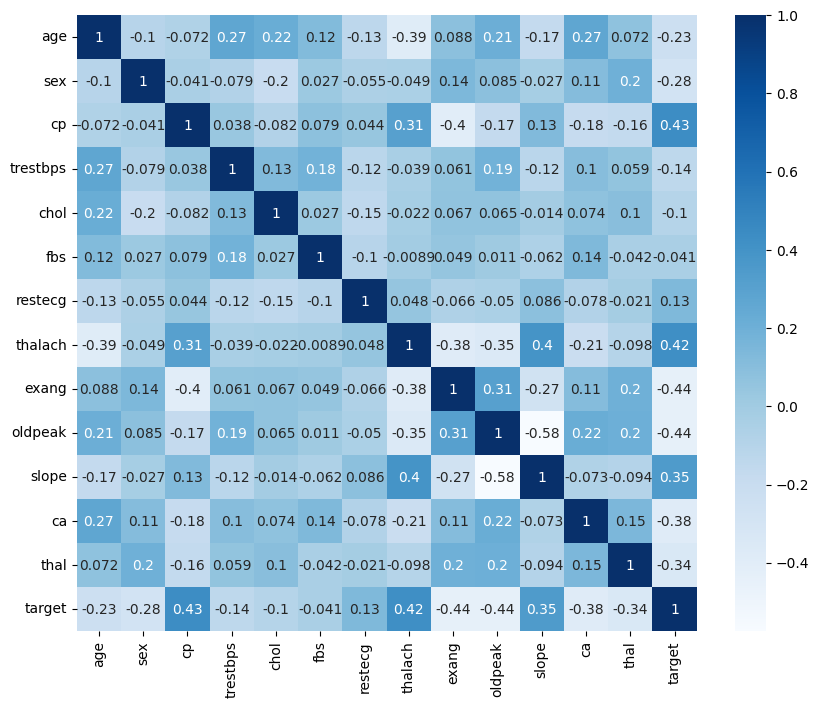

In [9]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

[0.07012197 0.06050167 0.12034374 0.05895222 0.06066902 0.02047918
 0.0364063  0.08746133 0.10594924 0.09041821 0.06763442 0.12258272
 0.09847998]


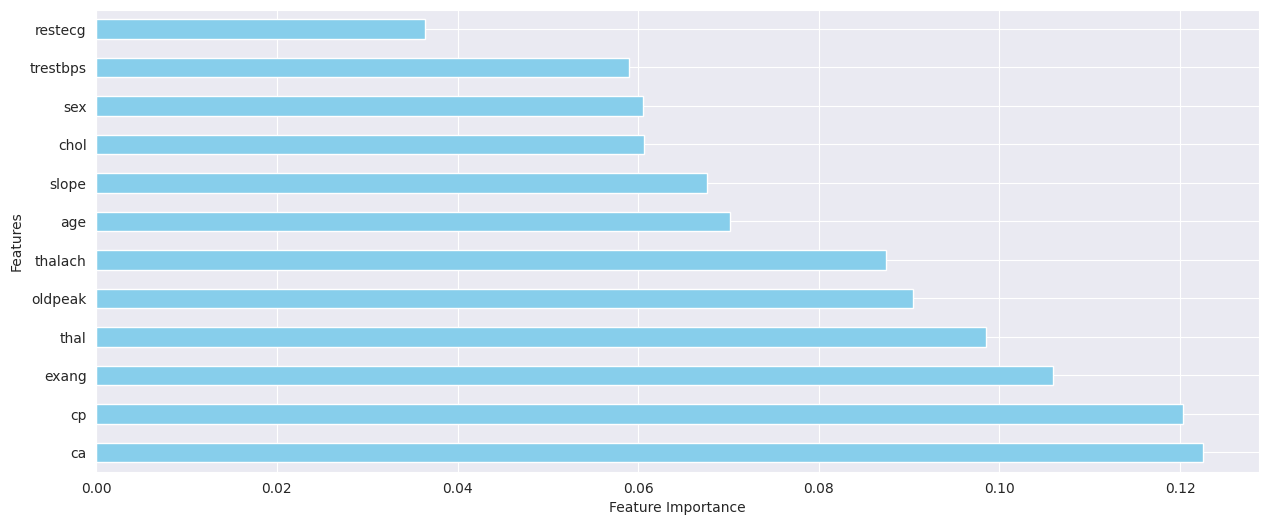

In [11]:
# feature selection (according to gini impurity)
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = df.iloc[:, :-1]
y = df.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh', color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')

plt.show()

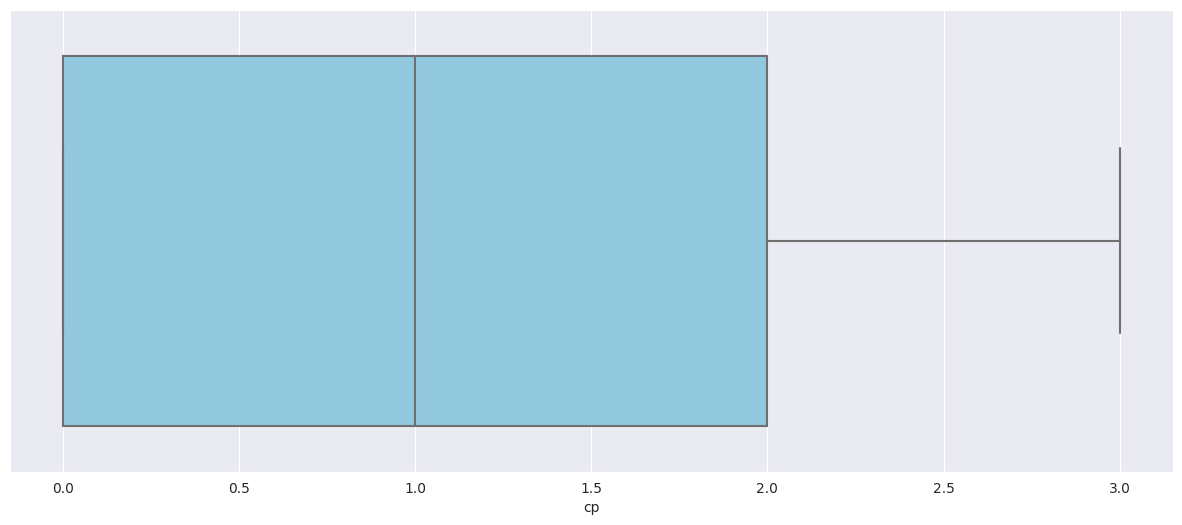

<Figure size 100x200 with 0 Axes>

In [12]:
sns.boxplot(x = df.cp, color='skyblue')
plt.figure(figsize=(1, 2))
plt.show()

<Axes: xlabel='ca'>

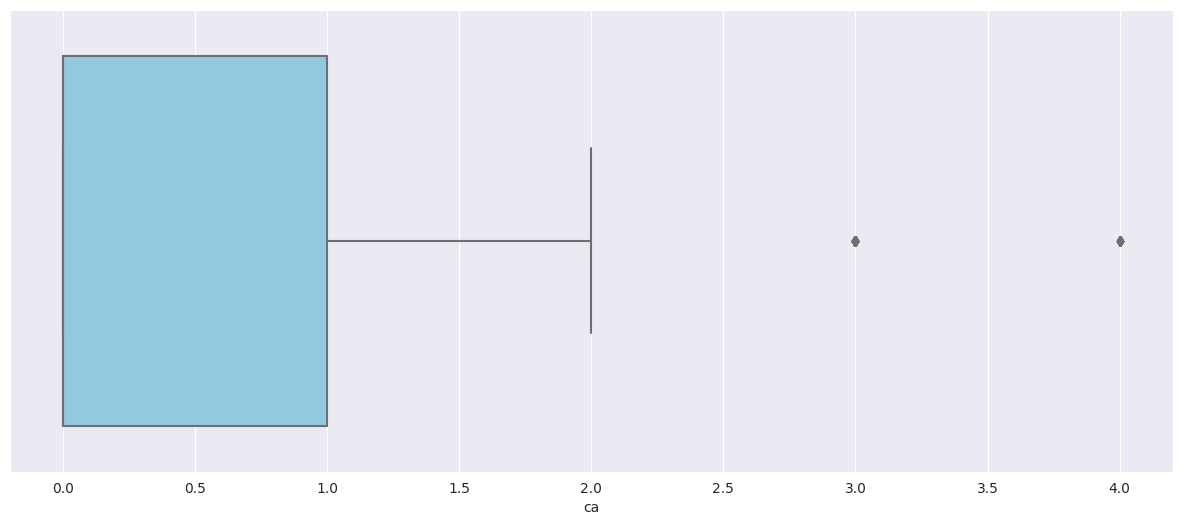

In [13]:
sns.boxplot(x = df.ca, color='skyblue')
# plt.show()

<Axes: xlabel='thal'>

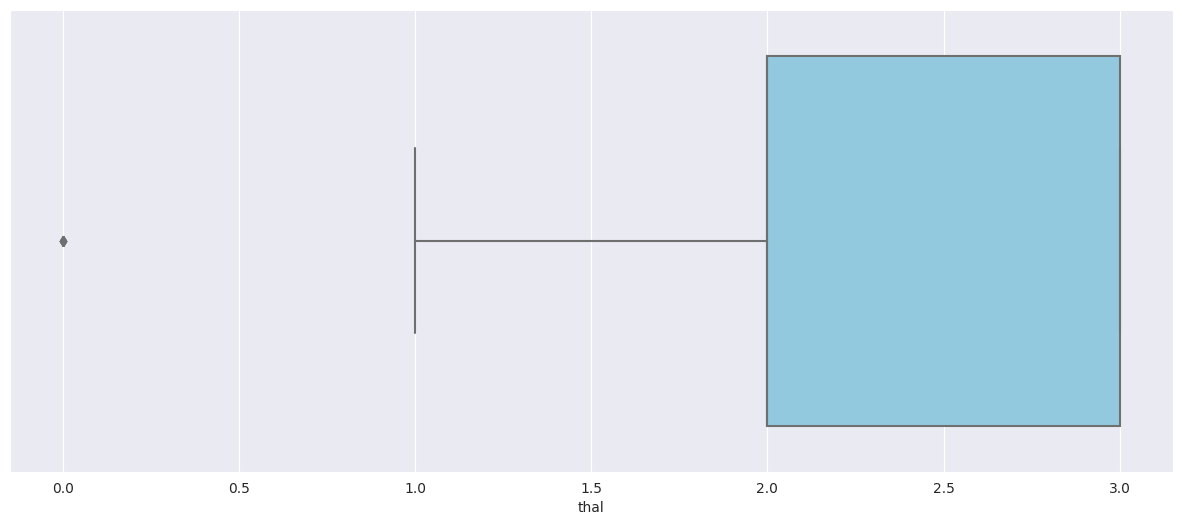

In [14]:
sns.boxplot(x = df.thal, color='skyblue')
# plt.show()

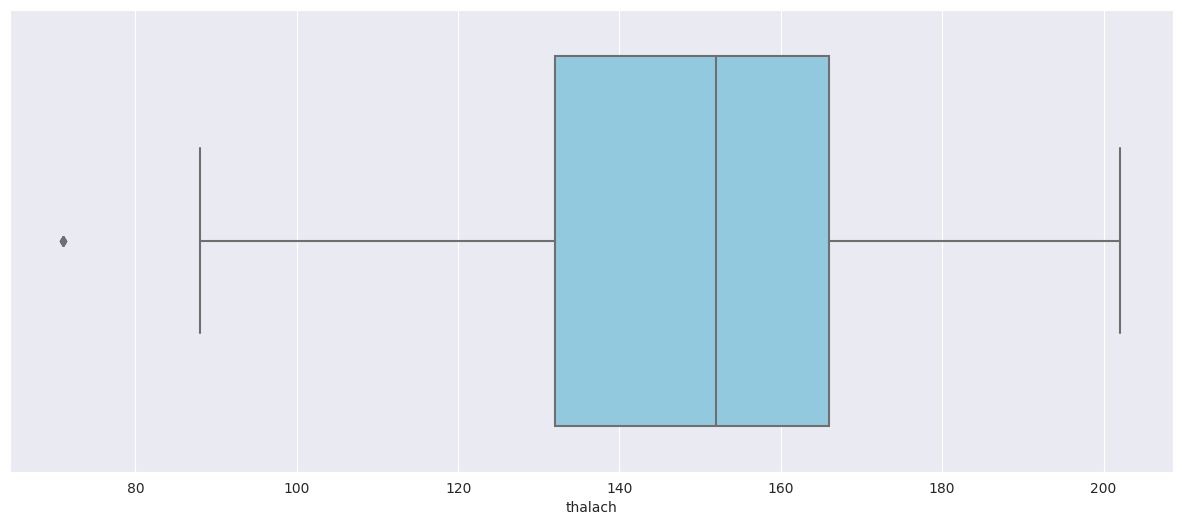

In [15]:
sns.boxplot(x = df.thalach, color='skyblue')
plt.show()

[Text(0, 0, '35.5'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '12'),
 Text(0, 0, '43'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '23'),
 Text(0, 0, '28'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '20.5'),
 Text(0, 0, ''),
 Text(0, 0, '21'),
 Text(0, 0, '26'),
 Text(0, 0, '6'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '25'),
 Text(0, 0, '32'),
 Text(0, 0, '30.75'),
 Text(0, 0, '39'),
 Text(0, 0, '33'),
 Text(0, 0, '21'),
 Text(0, 0, '19.75'),
 Text(0, 0, '17'),
 Text(0, 0, '18.5'),
 Text(0, 0, '9'),
 Text(0, 0, '3'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '24'),
 Text(0, 0, '52.5'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

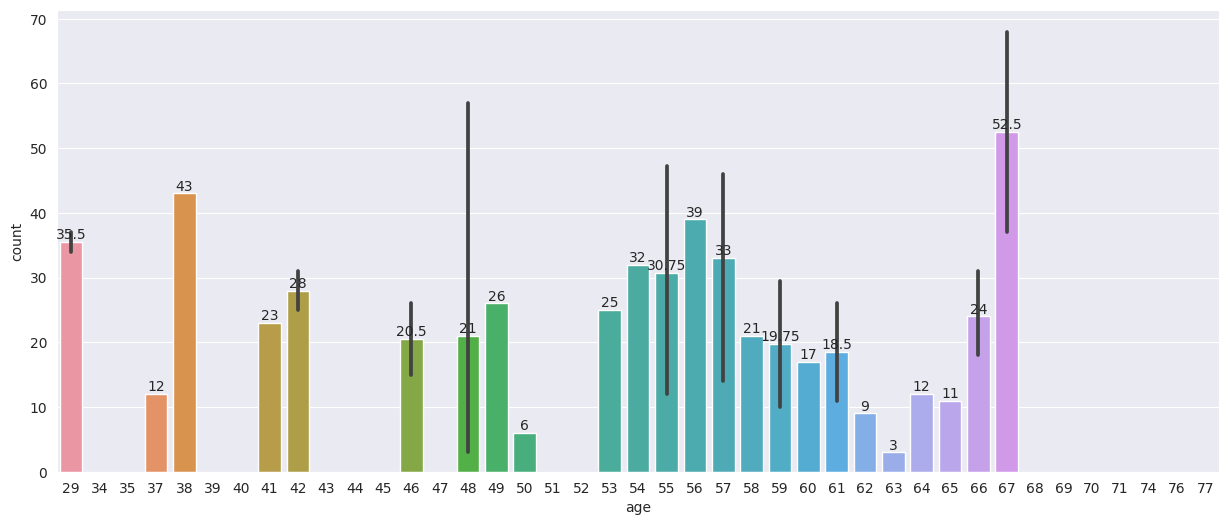

In [16]:
ax=sns.barplot(df,x='age',y=df['age'].value_counts())
ax.bar_label(ax.containers[0], fontsize=10)

In [17]:
(df.age==55).sum()

30

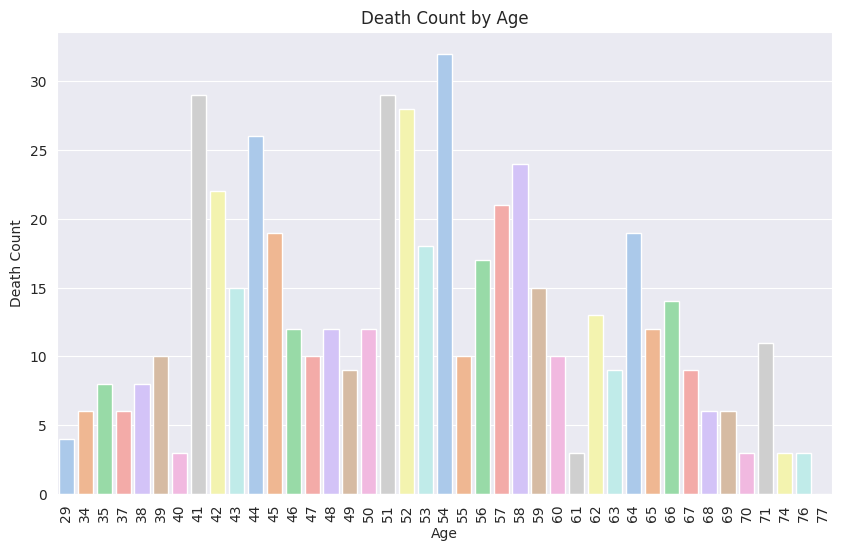

In [18]:
age_death_count = df.groupby('age')['target'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='target', data=age_death_count,palette=sns.color_palette("pastel"))
plt.xlabel('Age')
plt.ylabel('Death Count')
plt.title('Death Count by Age')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [19]:
((df.target==1)&(df.age==39)).sum()

10

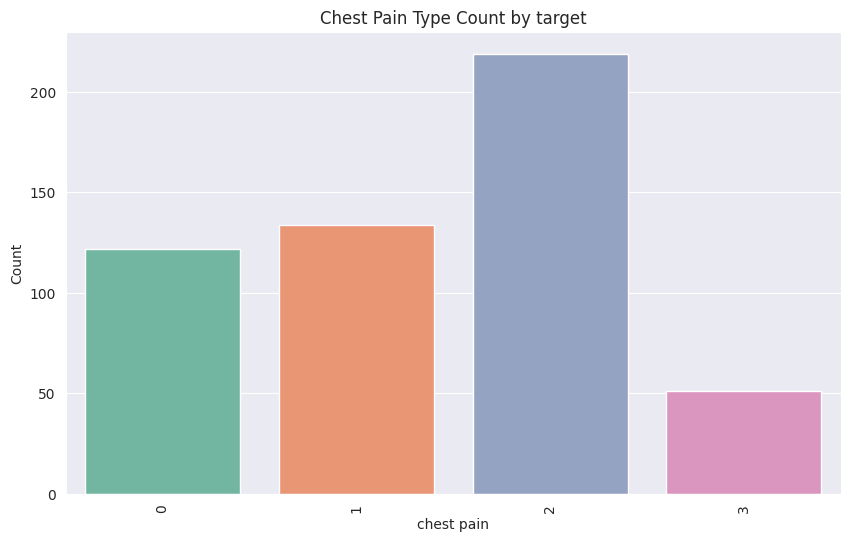

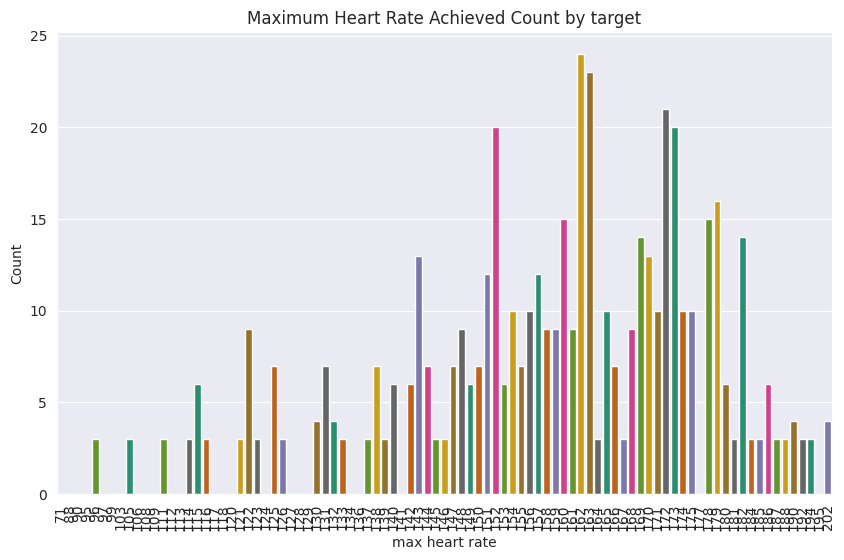

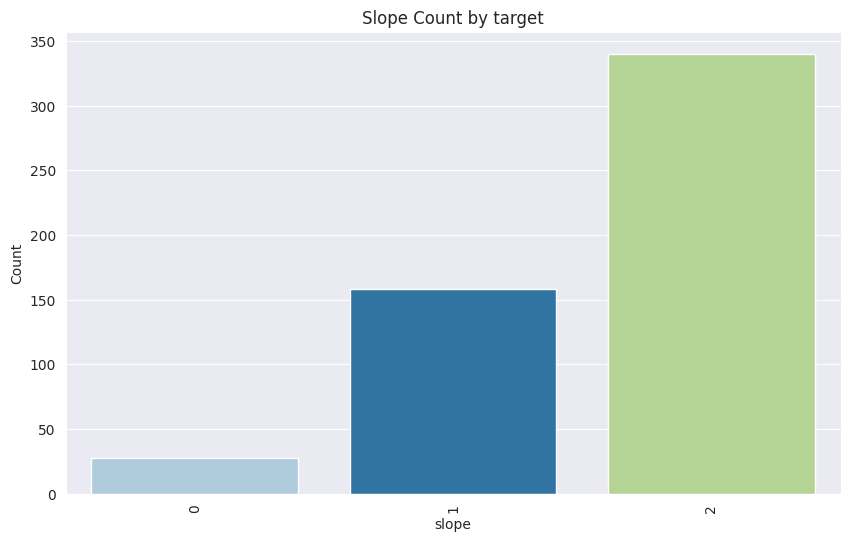

In [20]:
# Grouping by age and calculating the count for each category
cp_count = df.groupby('cp')['target'].sum().reset_index()
thalach_count = df.groupby('thalach')['target'].sum().reset_index()
slope_count = df.groupby('slope')['target'].sum().reset_index()

# Plotting for 'cp' with a different palette
plt.figure(figsize=(10, 6))
sns.barplot(x='cp', y='target', data=cp_count, palette=sns.color_palette("Set2"))
plt.xlabel('chest pain')
plt.ylabel('Count')
plt.title('Chest Pain Type Count by target')
plt.xticks(rotation=90)
plt.show()

# Plotting for 'thalach' with a different palette
plt.figure(figsize=(10, 6))
sns.barplot(x='thalach', y='target', data=thalach_count, palette=sns.color_palette("Dark2"))
plt.xlabel('max heart rate')
plt.ylabel('Count')
plt.title('Maximum Heart Rate Achieved Count by target')
plt.xticks(rotation=90)
plt.show()

# Plotting for 'slope' with a different palette
plt.figure(figsize=(10, 6))
sns.barplot(x='slope', y='target', data=slope_count, palette=sns.color_palette("Paired"))
plt.xlabel('slope')
plt.ylabel('Count')
plt.title('Slope Count by target')
plt.xticks(rotation=90)
plt.show()


<Axes: xlabel='age', ylabel='count'>

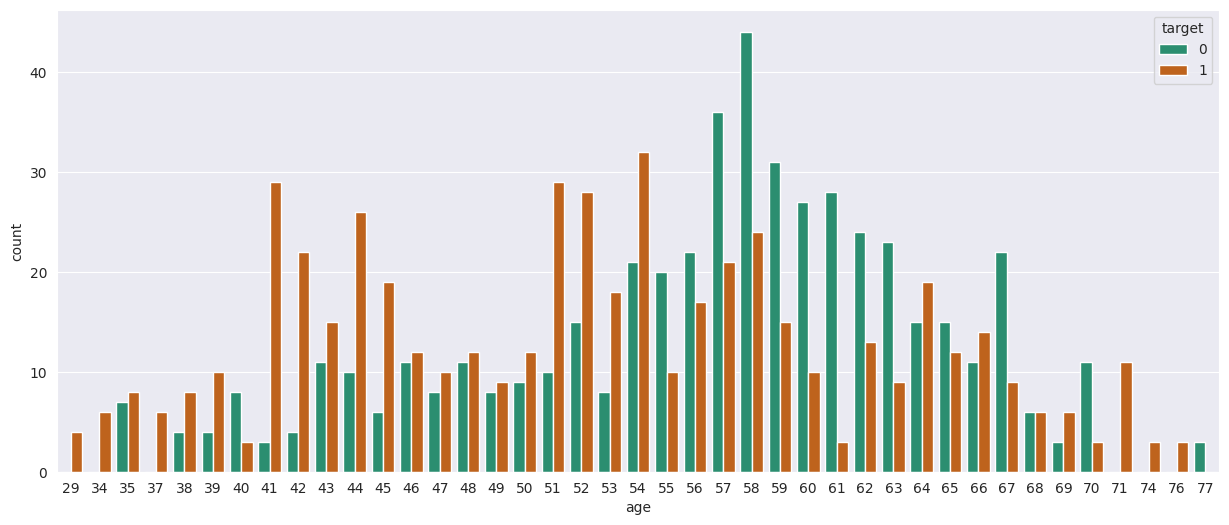

In [21]:
# df.groupby('age').size().sort_values(ascending=False)
sns.countplot(df,x='age',hue='target',palette=sns.color_palette("Dark2"))

<Axes: xlabel='sex', ylabel='count'>

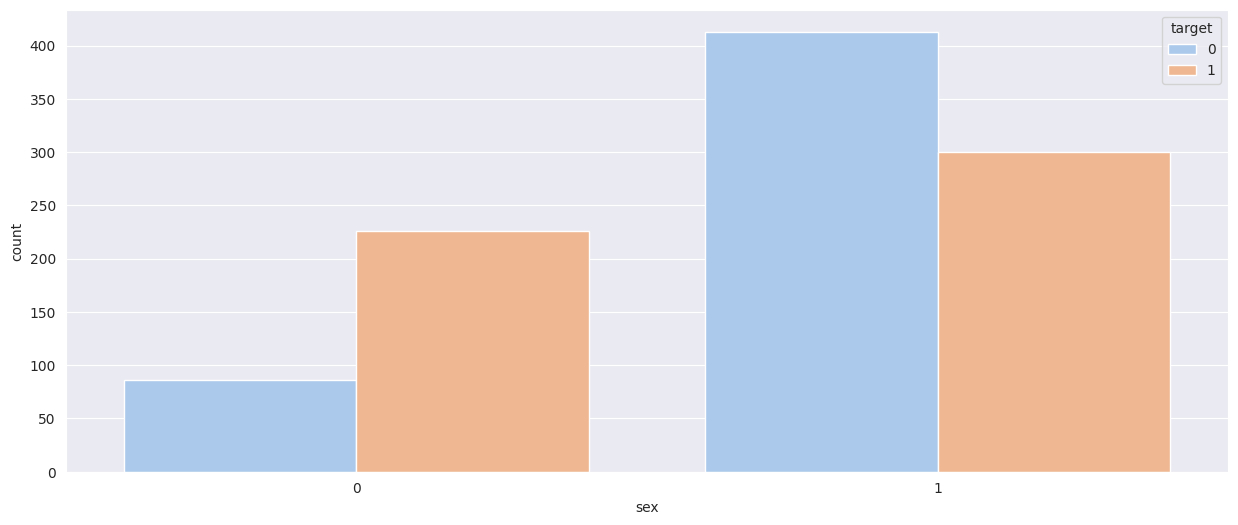

In [22]:
sns.countplot(df,x='sex',hue='target',palette=sns.color_palette("pastel"))

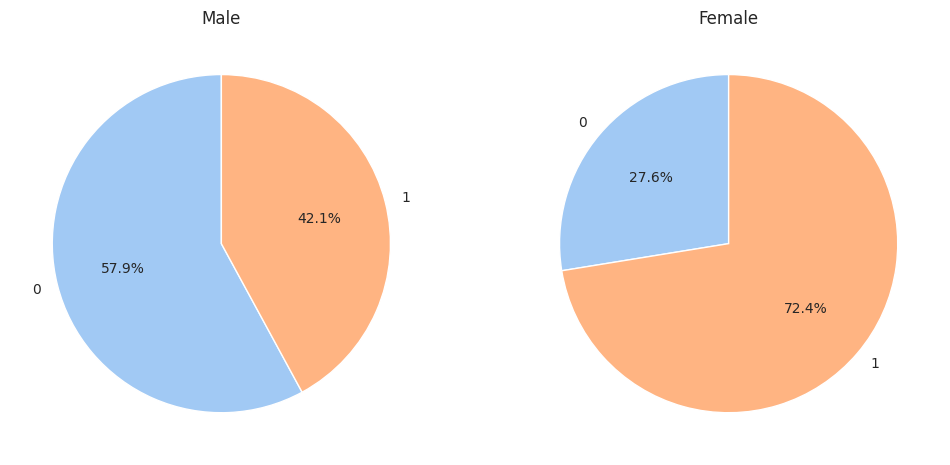

In [23]:
sex_target_counts = df.groupby(['sex', 'target']).size().unstack()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a subplot with two pie charts

# Pie chart for male
axes[0].pie(sex_target_counts.loc[1], labels=sex_target_counts.columns, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes[0].set_title('Male')

# Pie chart for female
axes[1].pie(sex_target_counts.loc[0], labels=sex_target_counts.columns, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes[1].set_title('Female')

plt.show()

In [24]:
print(np.round((((df.sex==1)&(df.target==1)).sum()/(df.sex==1).sum())*100,1),"%")

42.1 %


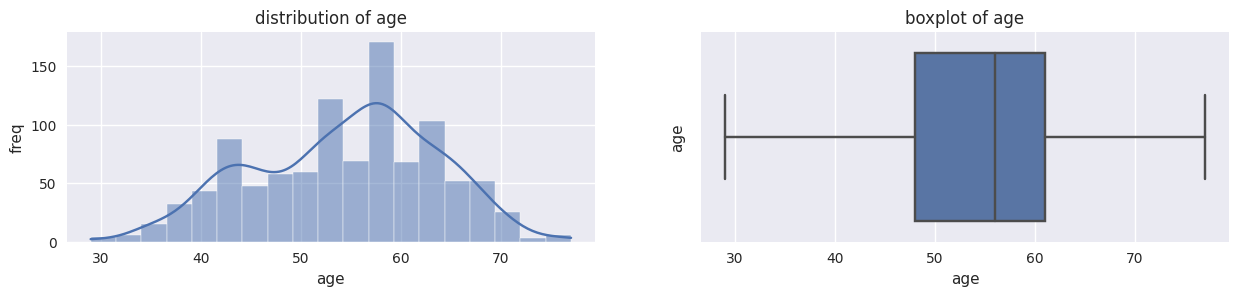

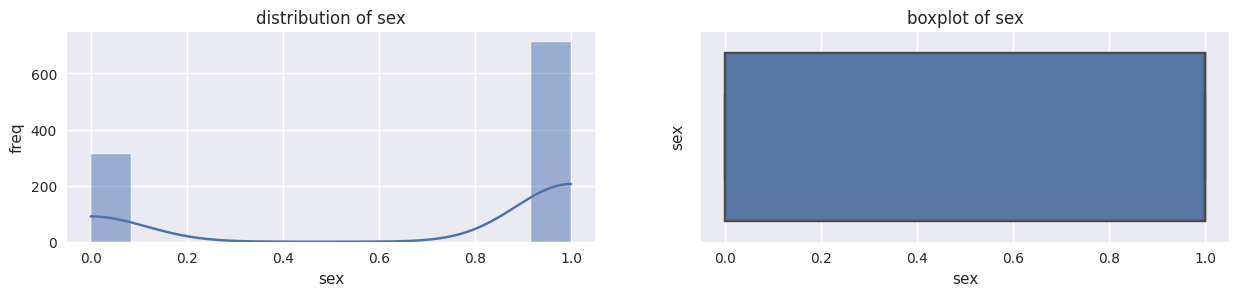

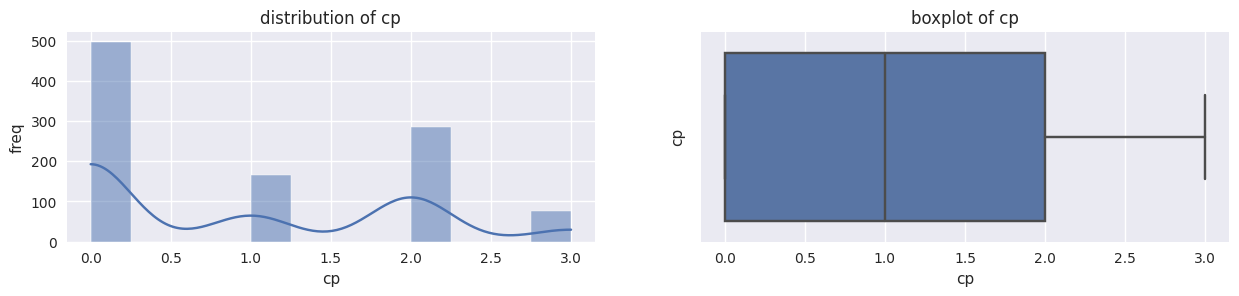

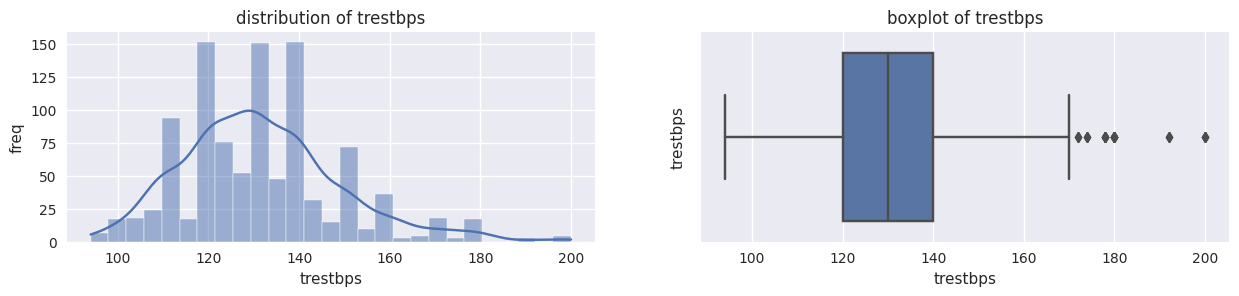

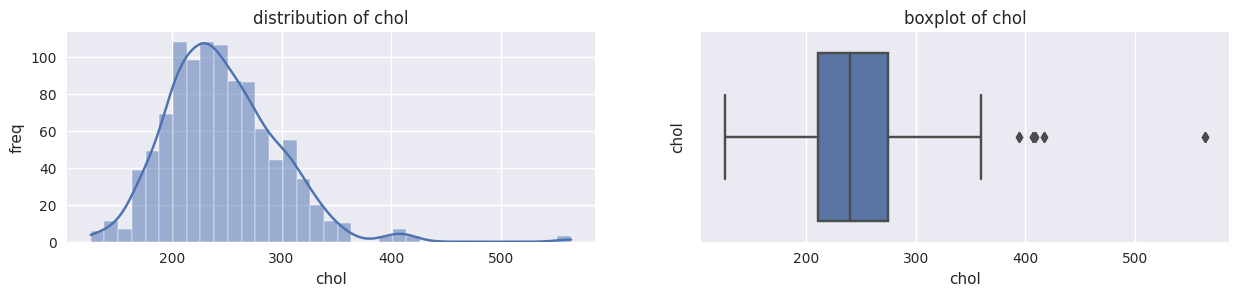

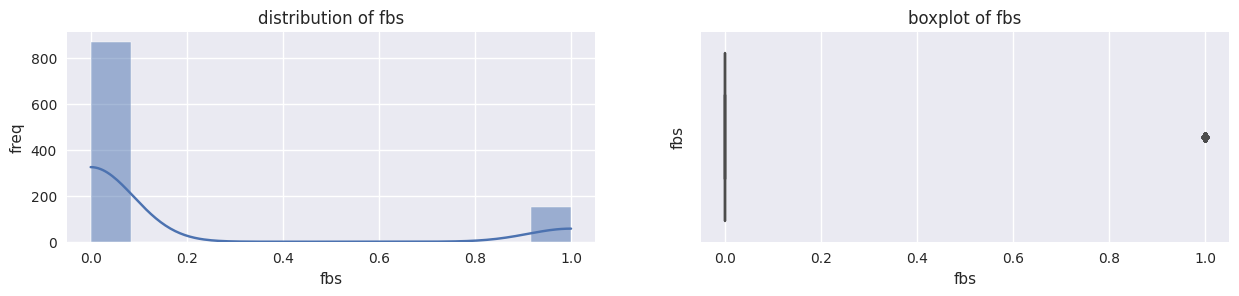

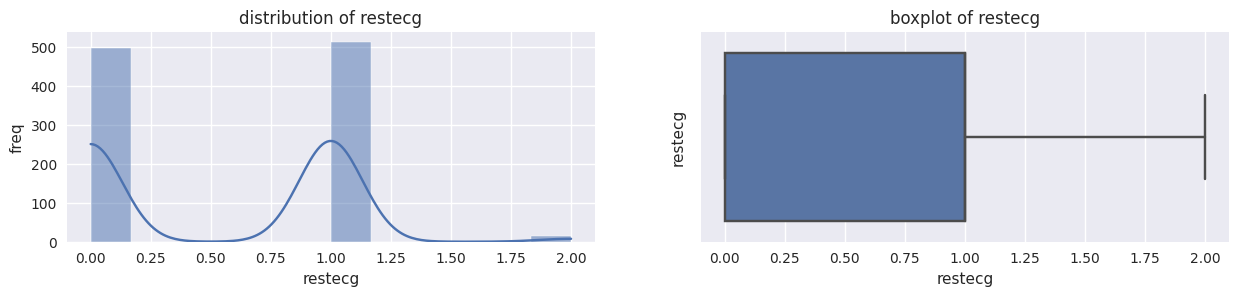

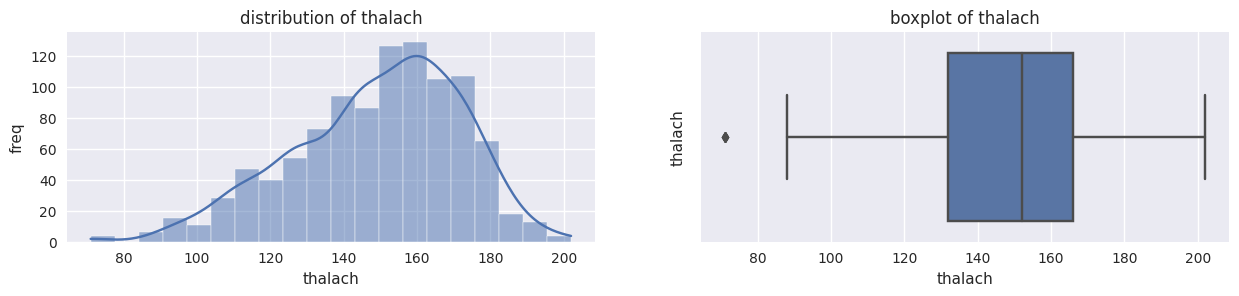

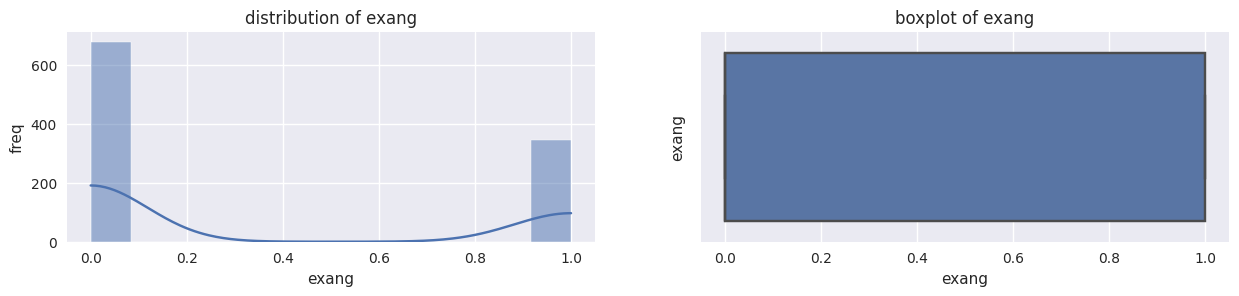

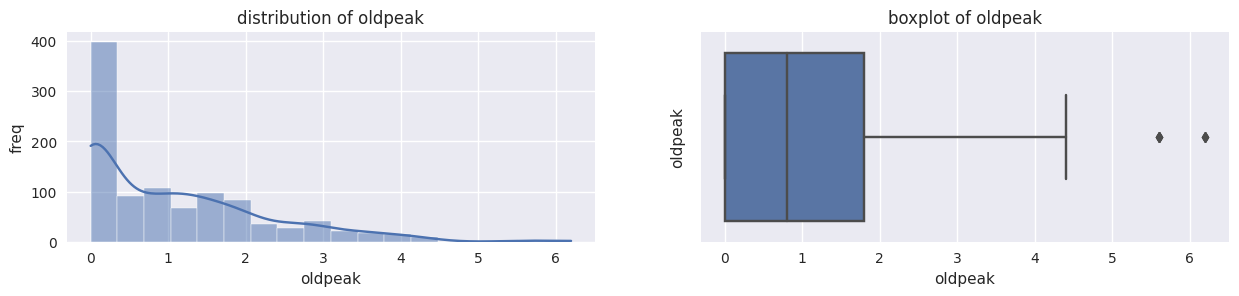

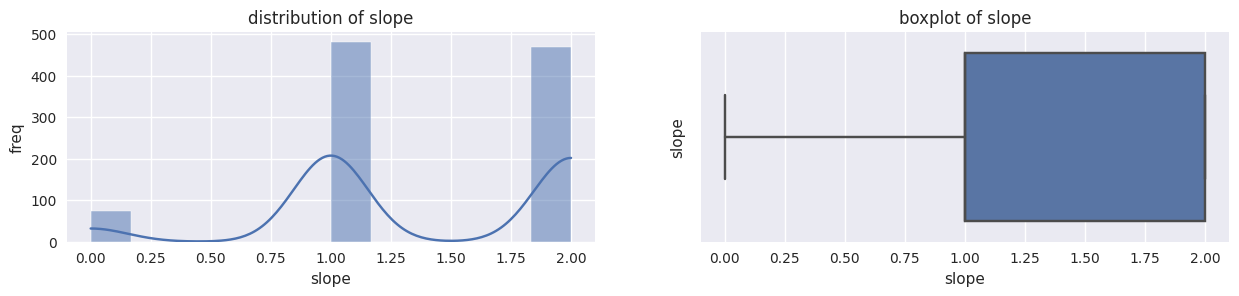

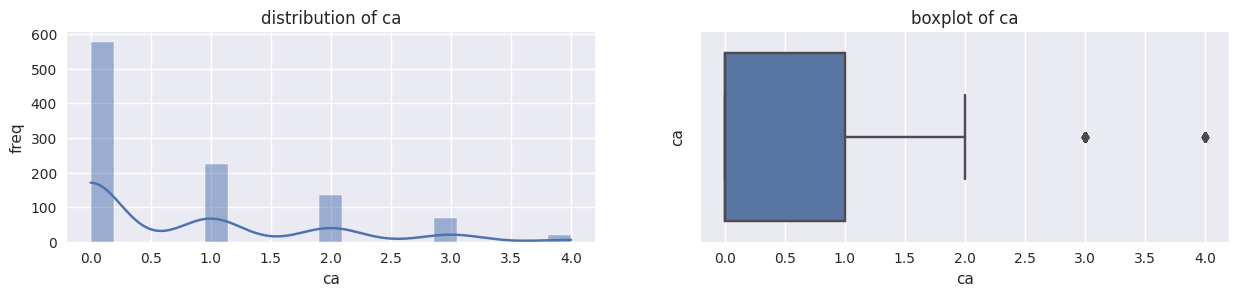

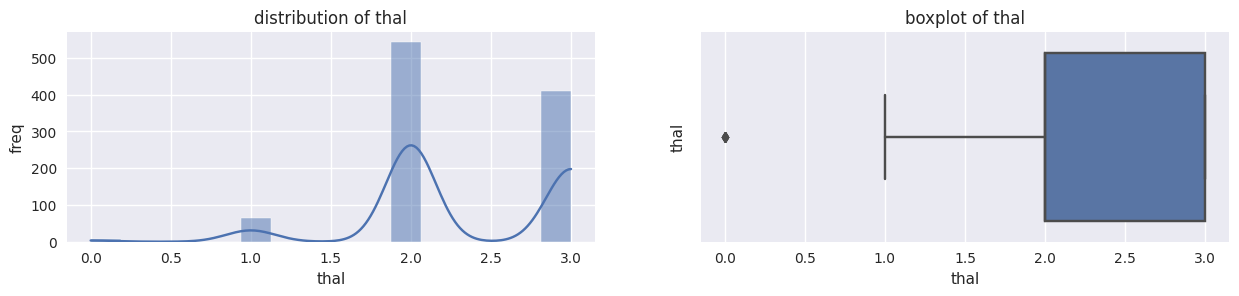

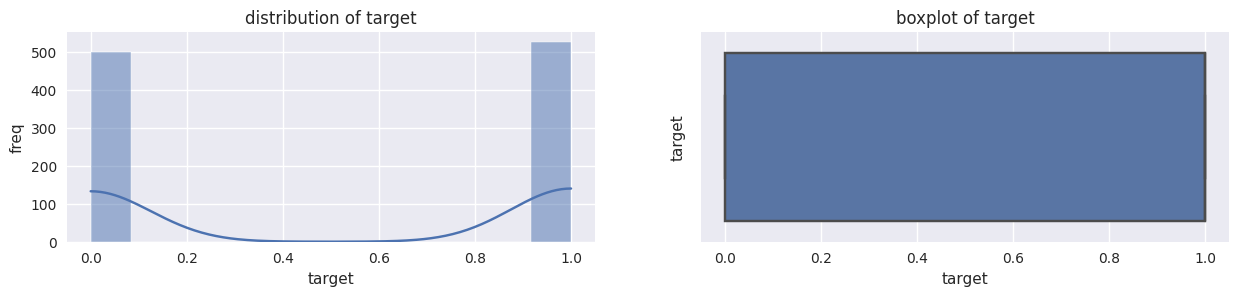

In [25]:
plt.style.use("seaborn")
for column in df.columns:
    if df[column].dtype!="object":
        plt.figure(figsize=(15,6))
        plt.subplot(2,2,1)
        sns.histplot(data=df,x=column,kde=True)
        plt.ylabel("freq")
        plt.xlabel(column)
        plt.title(f"distribution of {column}")
        plt.subplot(2,2,2)
        sns.boxplot(data=df,x=column)
        plt.ylabel(column)
        plt.title(f"boxplot of {column}")
        plt.show()

In [26]:
df['chol'].quantile([0.25, 0.5, 0.75,1.0])

0.25    211.0
0.50    240.0
0.75    275.0
1.00    564.0
Name: chol, dtype: float64

In [27]:
df[df['chol']>=564]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [28]:
df['trestbps'].quantile([0.25, 0.5, 0.75,1.0])

0.25    120.0
0.50    130.0
0.75    140.0
1.00    200.0
Name: trestbps, dtype: float64

In [29]:
df[df['trestbps']>=200]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
294,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
508,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
688,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0


In [30]:
x = df.drop("target", axis=1)
y = df['target']

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1,1))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, shuffle = True, random_state = 42, stratify = y)

print(f"The Shape of x_train : {X_train.shape}")
print(f"The Shape of x_test : {X_test.shape}")
print(f"The Shape of y_train : {y_train.shape}")
print(f"The Shape of y_test : {y_test.shape}")

The Shape of x_train : (615, 13)
The Shape of x_test : (410, 13)
The Shape of y_train : (615, 1)
The Shape of y_test : (410, 1)


Testing Logistic Regression
Accuracy: 82.93 %


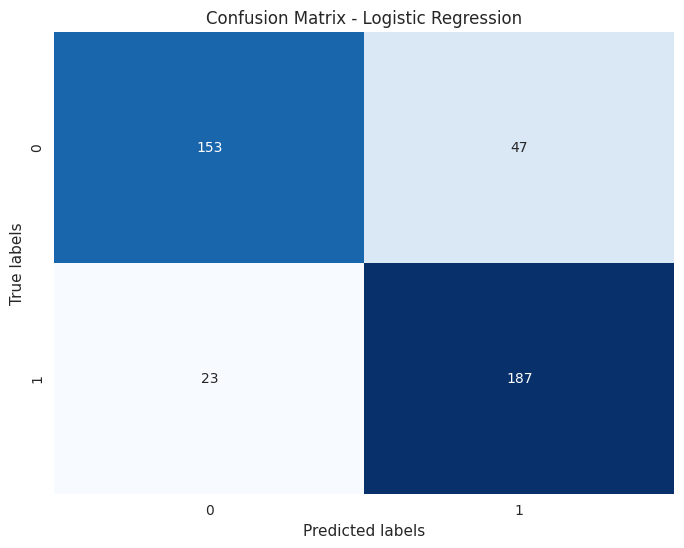

Testing DecisionTree
Accuracy: 97.8 %


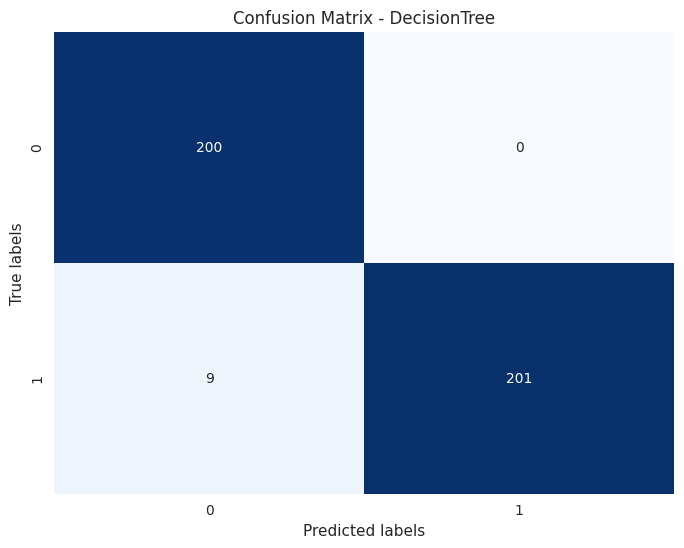

Testing SupportVector
Accuracy: 88.78 %


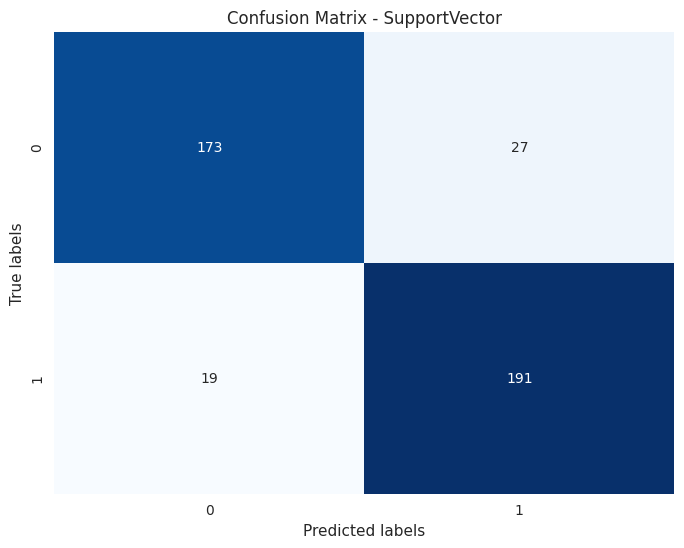

Testing KNearestNeighbours
Accuracy: 82.2 %


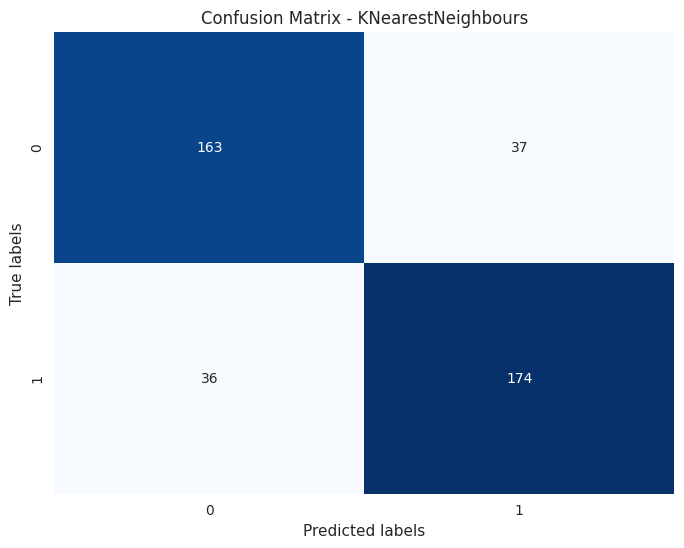

Testing RandomForest
Accuracy: 98.54 %


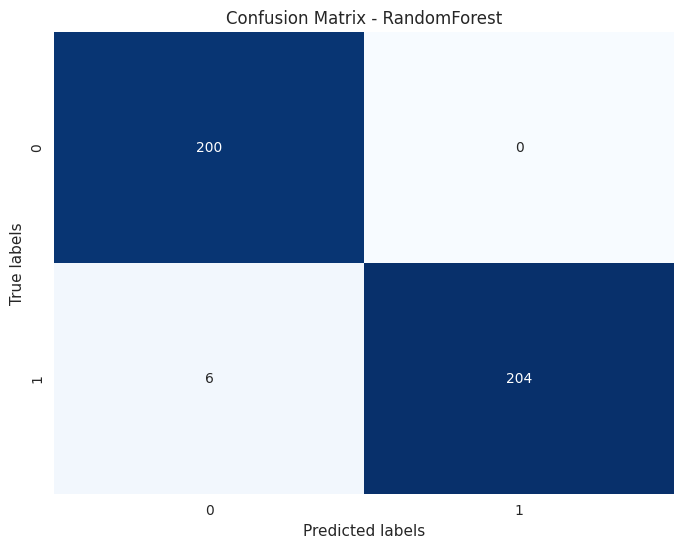

Testing XGBOOST
Accuracy: 97.07 %


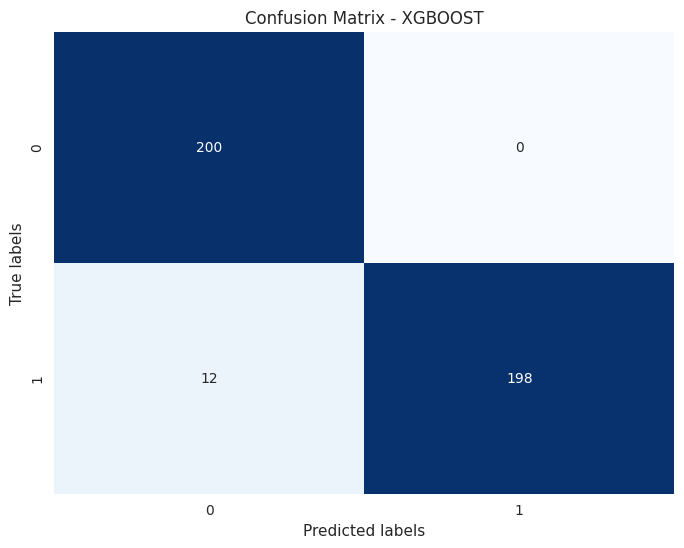

Testing CATBOOST
Accuracy: 97.8 %


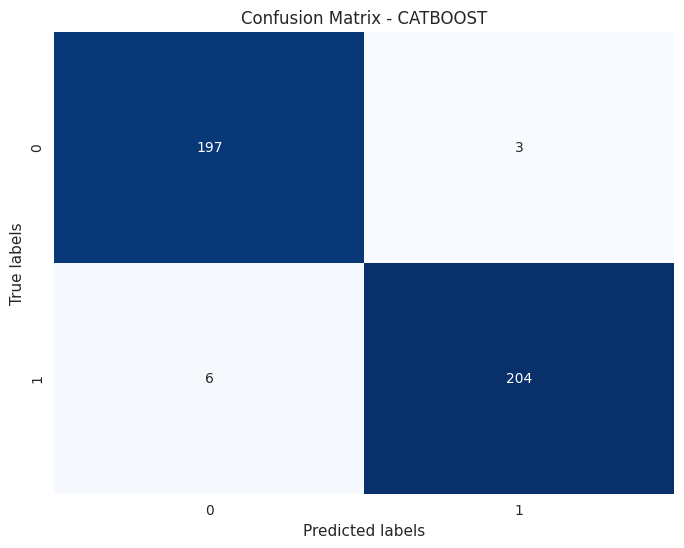

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Assuming X_train, X_test, y_train, y_test are your training and test data and labels

models = {
    "Logistic Regression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "SupportVector": SVC(),
    "KNearestNeighbours": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBOOST": XGBClassifier(),
    "CATBOOST": CatBoostClassifier(silent=True)
}

for model_name, model in models.items():
    print("Testing", model_name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate accuracy in percentage
    accuracy = accuracy_score(y_test, y_pred) * 100
    print("Accuracy:", np.round(accuracy,2), "%")
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - ' + model_name)
    plt.show()


In [34]:
def encode_gender(sex):
    return 1 if sex.lower() == 'male' else 0

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
import pickle

# Define your preprocessing steps
preprocessor = MinMaxScaler()  # : for scaling numerical features
num_col=list(df.columns)
trf1=ColumnTransformer([
    ('scaling',MinMaxScaler(),slice(1,14))
])
# Define your model
model = RandomForestClassifier()  # : RandomForestClassifier
# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', trf1),
    ('model', model)
])

# Train the pipeline (assuming X_train, y_train are your training data and labels)
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  slice(1, 14, None))])),
                ('model', RandomForestClassifier())])

In [35]:
from sklearn import set_config
set_config(display='diagram')

In [36]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  slice(1, 14, None))])),
                ('model', RandomForestClassifier())])

In [37]:
len(df.columns)

14

In [38]:
pipeline.predict(X_test)

array([0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [39]:
pipeline.named_steps['model'][0]

DecisionTreeClassifier(max_features='sqrt', random_state=1257857374)

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
clf=RandomForestClassifier()
scores=cross_val_score(pipeline,x,y,cv=10)
scores

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.97058824, 1.        ])

In [42]:
scores.mean()

0.9970588235294118

In [43]:
score = cross_val_score(pipeline, X_train, y_train, cv=10)
score.mean()

0.9741142252776308

In [44]:
from sklearn.model_selection import GridSearchCV
param={
    'model__n_estimators':[10,20,30,40,60,80,100]
}
grid = GridSearchCV(pipeline, param,cv=10,scoring='f1')
grid.fit(X_train,y_train)
grid.best_score_

0.9750604988263051

In [45]:
grid.best_params_

{'model__n_estimators': 100}

In [46]:
pipeline.predict(X_test)

array([0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [47]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", np.round(accuracy,3)*100,"%")


Accuracy: 97.1 %


In [48]:
# Save the pipeline
pickle.dump(pipeline, open('model_pipeline.pkl','wb'))

In [49]:
pipe = pickle.load(open('/kaggle/working/model_pipeline.pkl','rb'))

In [50]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
639,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
593,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
909,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0
451,49,0,1,134,271,0,1,162,0,0.0,1,0,2,1


In [51]:
test_input=np.array([68, 1, 2, 180,274, 1, 0, 150, 1, 1.6, 1, 0, 3]).reshape(1,13)
pipe.predict(test_input)

array([0.])